## 2 sample Hypothesis testing

https://www.youtube.com/watch?v=NkGvw18zlGQ

In [1]:
import scipy.stats as stats
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

%matplotlib inline

def visual_test(statistic, critical, dist = 'Norm', df = 0):
    '''
    Function to plot the normal or the t-student distribution 
    showing the location of the critical values and the statistic location.
    Inputs:
        statistic -> user's statistic
        critical  -> critical value
    Parameter:
        dist -> distribution to use
        df   -> degrees of freedom
    Outputs:
        Plots the corresponding distribution showin the user statistic location and the critical value.
    '''

    mu = 0
    sigma = 1

    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    x0 = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

    if ( dist == 'Norm' ):
        plt.plot(x, stats.norm.pdf(x, mu, sigma))
        plt.fill_between(x0,stats.norm.pdf(x, mu, sigma),where = (x < -critical),facecolor='red')
        plt.fill_between(x0,stats.norm.pdf(x, mu, sigma),where = (x > critical),facecolor='red')
    else:
        if ( df == 0 ):
            while ( df == 0 or type(df) != int):
                try:
                    df = int(input("Set the correct value of degrees of freedom please: " )) 
                except:
                    df = 0       
        plt.plot(x, stats.t.pdf(x,df))
        plt.fill_between(x0,stats.t.pdf(x,df),where = (x < -critical),facecolor='red')
        plt.fill_between(x0,stats.t.pdf(x,df),where = (x > critical),facecolor='red')

    plt.axvline(-critical, c = 'r')
    plt.axvline(critical, c = 'r')
    plt.axvline(-statistic,c='b')
    plt.axvline(statistic,c='b')

    plt.show()

Let's generate two populations of students. 

* Male students with an average speed of 140km/h and standard deviation of 15km/h. 

* Female students with an average speed of 110km/h and standard deviation of 10km/h.

In [3]:
pop_males = stats.norm.rvs(size=1000,loc=140, scale = 15, random_state = 1)
pop_females = stats.norm.rvs(size=1000,loc=110, scale = 10, random_state = 7)

Let's pick two samples of 34 males and 29 females from the previous populations.

In [4]:
type(pop_males)

numpy.ndarray

In [5]:
males_sample = np.random.choice(pop_males,size=34, replace=False) # pop_males.sample() not possible because `.sample()`only works with pandas Dataframes
females_sample = np.random.choice(pop_females,size=29, replace=False) #

In [6]:
type(males_sample)

numpy.ndarray

In [8]:
mean_males = np.mean(males_sample)# use np.mean()
mean_females = np.mean(females_sample)# use np.mean()

print("The sample mean of males is: {:.2f}".format(mean_males))
print("The sample mean of females is: {:.2f}".format(mean_females))

The sample mean of males is: 139.01
The sample mean of females is: 109.55


In [9]:
std_males = np.std(males_sample, ddof=1)# use np.std() ddof = ?
std_females = np.std(females_sample, ddof=1)# use np.std() ddof = ?

print("The sample standard deviation of males is: {:.2f}".format(std_males))
print("The sample standard deviation of females is: {:.2f}".format(std_females))

The sample standard deviation of males is: 15.23
The sample standard deviation of females is: 11.38


Now, let's compute our statistic

In [10]:
t = ( mean_males - mean_females ) / np.sqrt( ((std_males**2)/34) + ((std_females**2)/29 ) )

print("Our t statistic is: {:.2f}".format(t))

Our t statistic is: 8.77


Now let's compute the critical value. As the smallest sample size is 29 which is < 30, we need to use the t-Student distribution. The number of degrees of freedom is $df \equiv n_{2}-1=29-1=28$.

Setting the confidence level to 95%. What is the critical value?

In [11]:
tc = stats.t.ppf(1-(0.05/2),df=28) 

print("The tc critical value is: {:.2f}".format(tc))

The tc critical value is: 2.05


Compare t with tc. Are you in the rejection area?

<b>we reject it 

Try the same with the normal distribution

In [16]:
zc = stats.norm.ppf(1-(0.05/2))# stats.norm.ppf()

print("The tc critical value is: {:.2f}".format(zc))

The tc critical value is: 1.96


* Now do the same with visual_test() function.
* See what happens if you do the test with t-Student distribution.

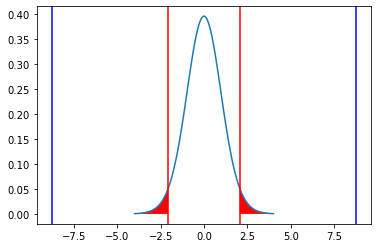

In [14]:
visual_test(t,tc,dist = 't', df = 28)